Extracting Dataset using Kaggle API

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# installing the Kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [16]:
# Kaggle api
! kaggle competitions download -c dogs-vs-cats

 97% 785M/812M [00:06<00:00, 147MB/s]
100% 812M/812M [00:06<00:00, 126MB/s]


In [17]:
!ls

dogs-vs-cats.zip  drive  sample_data


In [18]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [19]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [20]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [21]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.4831.jpg', 'cat.4845.jpg', 'dog.1382.jpg', 'cat.3009.jpg', 'dog.7437.jpg', 'cat.10225.jpg', 'dog.950.jpg', 'dog.8871.jpg', 'cat.3490.jpg', 'cat.3742.jpg', 'dog.4188.jpg', 'dog.12025.jpg', 'dog.11572.jpg', 'cat.3160.jpg', 'dog.4457.jpg', 'cat.4506.jpg', 'dog.385.jpg', 'dog.5930.jpg', 'dog.716.jpg', 'dog.5079.jpg', 'cat.638.jpg', 'cat.3035.jpg', 'cat.5807.jpg', 'dog.993.jpg', 'cat.12176.jpg', 'cat.4273.jpg', 'cat.5493.jpg', 'dog.1681.jpg', 'dog.8858.jpg', 'cat.7555.jpg', 'dog.6602.jpg', 'cat.295.jpg', 'cat.532.jpg', 'cat.6294.jpg', 'dog.1659.jpg', 'cat.1494.jpg', 'dog.7801.jpg', 'cat.548.jpg', 'dog.11235.jpg', 'cat.10697.jpg', 'dog.6018.jpg', 'cat.5060.jpg', 'dog.3793.jpg', 'cat.5505.jpg', 'cat.7454.jpg', 'dog.11449.jpg', 'cat.3706.jpg', 'cat.923.jpg', 'dog.11172.jpg', 'cat.9560.jpg', 'dog.1204.jpg', 'cat.7670.jpg', 'cat.7740.jpg', 'cat.11728.jpg', 'cat.2446.jpg', 'dog.351.jpg', 'cat.2629.jpg', 'dog.7125.jpg', 'cat.4538.jpg', 'cat.8927.jpg', 'cat.5297.jpg', 'dog.3702.jpg', 'dog.102

Importing the Dependencies

In [22]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

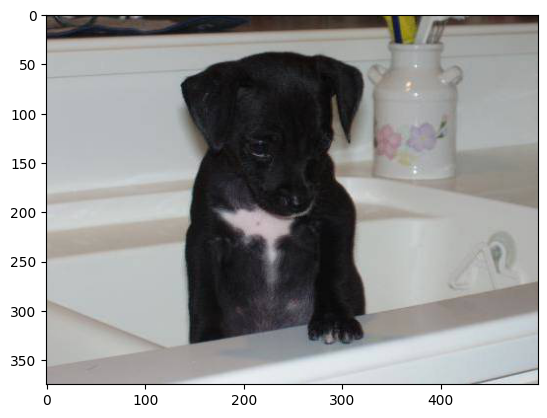

In [23]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

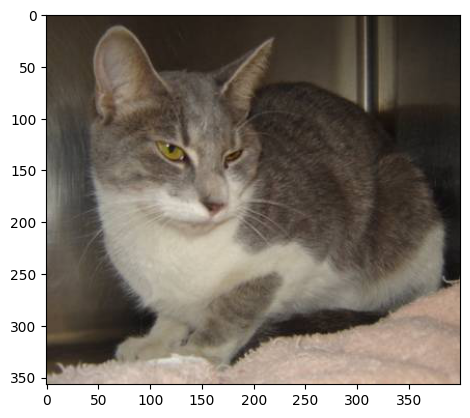

In [24]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [25]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



cat
cat
dog
cat
dog


In [26]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [27]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [28]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

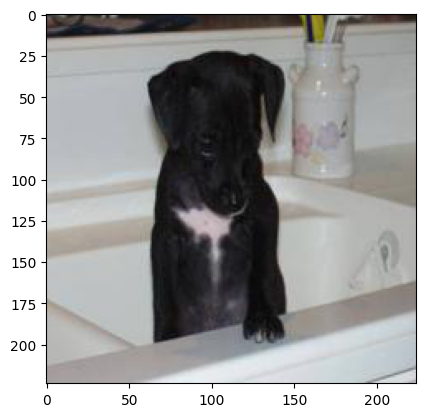

In [29]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

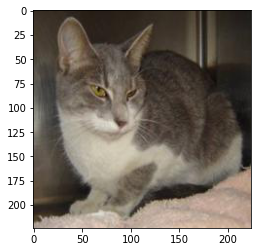

In [ ]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [30]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [31]:
print(filenames[0:5])
print(len(filenames))

['cat.4831.jpg', 'cat.4845.jpg', 'dog.1382.jpg', 'cat.3009.jpg', 'dog.7437.jpg']
2000


In [32]:
print(labels[0:5])
print(len(labels))

[0, 0, 1, 0, 1]
2000


In [33]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1002  998]


Converting all the resized images to numpy arrays

In [34]:
import cv2
import glob

In [35]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [36]:
print(dog_cat_images)

[[[[ 26  27  31]
   [ 26  27  31]
   [ 25  26  30]
   ...
   [ 46  55  59]
   [ 44  53  57]
   [ 25  34  38]]

  [[ 29  30  34]
   [ 27  30  34]
   [ 28  29  33]
   ...
   [ 42  51  55]
   [ 44  53  57]
   [ 32  41  45]]

  [[ 23  26  30]
   [ 22  27  30]
   [ 22  25  29]
   ...
   [ 38  44  49]
   [ 40  46  51]
   [ 30  36  41]]

  ...

  [[ 84 101 127]
   [ 89 106 132]
   [ 95 115 140]
   ...
   [ 74  86  88]
   [ 33  45  49]
   [ 24  39  42]]

  [[ 85 102 128]
   [ 92 109 135]
   [100 117 143]
   ...
   [ 73  85  87]
   [ 33  45  49]
   [ 28  40  44]]

  [[ 86 103 129]
   [ 93 110 136]
   [100 117 143]
   ...
   [ 71  83  83]
   [ 31  42  46]
   [ 26  38  42]]]


 [[[117 111 112]
   [116 110 111]
   [116 111 112]
   ...
   [ 38  49  53]
   [ 36  47  51]
   [ 36  47  51]]

  [[113 107 108]
   [114 109 110]
   [117 112 113]
   ...
   [ 38  49  53]
   [ 37  48  52]
   [ 36  47  51]]

  [[109 104 105]
   [111 109 109]
   [115 113 113]
   ...
   [ 38  49  53]
   [ 37  48  52]
   [ 37  48

In [37]:
type(dog_cat_images)

numpy.ndarray

In [38]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [39]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [41]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [42]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [43]:
print(X_train_scaled)

[[[[0.         0.05490196 0.11764706]
   [0.         0.01960784 0.07843137]
   [0.07058824 0.         0.06666667]
   ...
   [0.15686275 0.14117647 0.16470588]
   [0.14509804 0.12941176 0.14901961]
   [0.12156863 0.10588235 0.1254902 ]]

  [[0.         0.03921569 0.09019608]
   [0.01176471 0.02352941 0.07843137]
   [0.09803922 0.01176471 0.08235294]
   ...
   [0.16862745 0.15294118 0.17647059]
   [0.15686275 0.14117647 0.16078431]
   [0.1254902  0.10980392 0.12941176]]

  [[0.02352941 0.09803922 0.12941176]
   [0.08235294 0.10196078 0.1372549 ]
   [0.17254902 0.0745098  0.12941176]
   ...
   [0.19215686 0.16470588 0.19215686]
   [0.18823529 0.16470588 0.18431373]
   [0.16470588 0.14117647 0.16078431]]

  ...

  [[0.83137255 0.84313725 0.80784314]
   [0.82745098 0.82352941 0.80784314]
   [0.83137255 0.79215686 0.81568627]
   ...
   [0.89019608 0.85882353 0.85882353]
   [0.90588235 0.88235294 0.85490196]
   [0.91372549 0.90588235 0.8627451 ]]

  [[0.82745098 0.88235294 0.74117647]
   [0.8

**Building the Neural Network**

In [44]:
import tensorflow as tf
import tensorflow_hub as hub

In [45]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [46]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [47]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [48]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 67s 1s/step - loss: 0.1938 - acc: 0.9231
Epoch 2/5
50/50 [==============================] - 62s 1s/step - loss: 0.0666 - acc: 0.9806
Epoch 3/5
50/50 [==============================] - 64s 1s/step - loss: 0.0492 - acc: 0.9887
Epoch 4/5
50/50 [==============================] - 62s 1s/step - loss: 0.0408 - acc: 0.9912
Epoch 5/5
50/50 [==============================] - 65s 1s/step - loss: 0.0329 - acc: 0.9931


In [49]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 16s 1s/step - loss: 0.0726 - acc: 0.9675
Test Loss = 0.0725657045841217
Test Accuracy = 0.9674999713897705


**Predictive System**

Path of the image to be predicted: /content/image resized/cat.9974.jpg


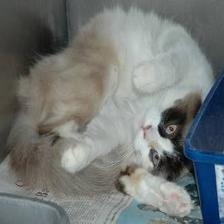

1/1 [==============================] - 1s 568ms/step
[[2.5224175  0.84352344]]
0
The image represents a Cat


In [51]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.jpg


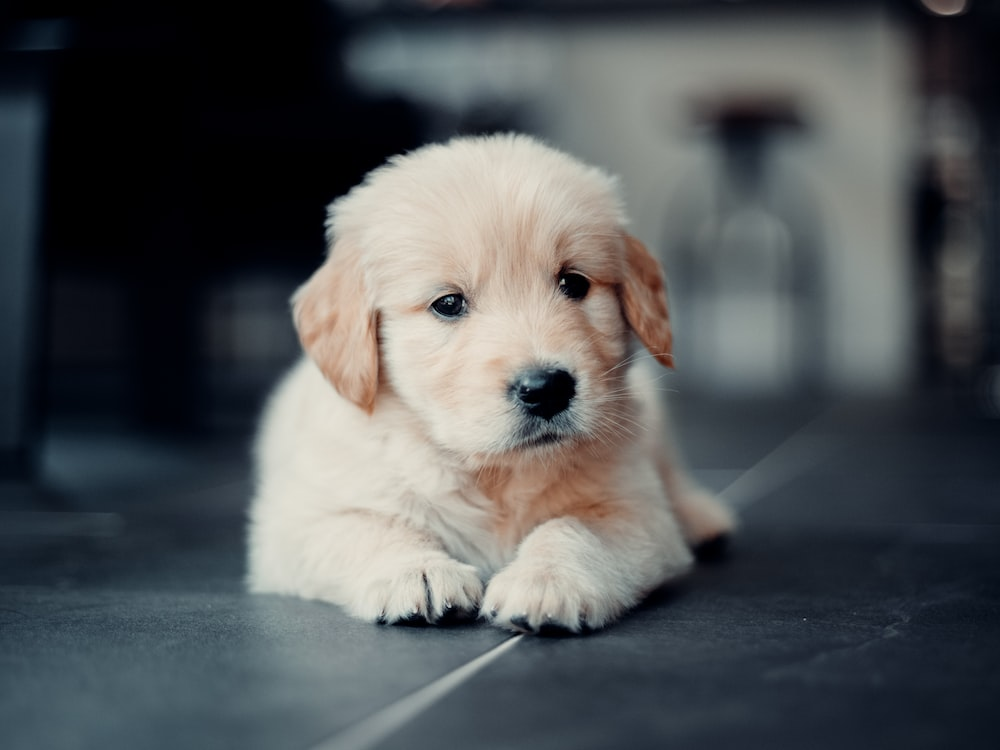

1/1 [==============================] - 0s 92ms/step
[[-3.1210597  3.8319528]]
1
The image represents a Dog


In [52]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')